In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv("Project.csv")
print(coffee.head())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301       01-06-2023         11:33:29         3        Astoria   
1          115405       02-06-2023         11:18:24         3        Astoria   
2          115478       02-06-2023         12:02:45         3        Astoria   
3          116288       02-06-2023         19:39:47         3        Astoria   
4          116714       03-06-2023         12:24:57         3        Astoria   

   product_id  transaction_qty  unit_price  Total_Bill product_category  \
0          45                1         3.0         3.0              Tea   
1          45                1         3.0         3.0              Tea   
2          45                1         3.0         3.0              Tea   
3          45                1         3.0         3.0              Tea   
4          45                1         3.0         3.0              Tea   

        product_type product_detail   Size Month Name  Day Name  Hou

In [9]:
print(coffee.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='str')


In [10]:
print(coffee.info())

<class 'pandas.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  str    
 2   transaction_time  149116 non-null  str    
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  str    
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  str    
 10  product_type      149116 non-null  str    
 11  product_detail    149116 non-null  str    
 12  Size              149116 non-null  str    
 13  Month Name        149116 non-null  str    
 14  Day Name          149116 non-null  str    
 15  Hour              149116 non-null  int64  
 16  Month             149116 non-nu

In [11]:
print(coffee.describe())

       transaction_id       store_id     product_id  transaction_qty  \
count   149116.000000  149116.000000  149116.000000    149116.000000   
mean     74737.371872       5.342063      47.918607         1.438276   
std      43153.600016       2.074241      17.930020         0.542509   
min          1.000000       3.000000       1.000000         1.000000   
25%      37335.750000       3.000000      33.000000         1.000000   
50%      74727.500000       5.000000      47.000000         1.000000   
75%     112094.250000       8.000000      60.000000         2.000000   
max     149456.000000       8.000000      87.000000         8.000000   

          unit_price     Total_Bill           Hour          Month  \
count  149116.000000  149116.000000  149116.000000  149116.000000   
mean        3.382219       4.686367      11.735790       3.988881   
std         2.658723       4.227099       3.764662       1.673091   
min         0.800000       0.800000       6.000000       1.000000   
25%   

In [12]:
print(coffee.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64


In [13]:
print(coffee.shape) 

(149116, 18)


In [14]:
print(coffee.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool


In [15]:
print(coffee.dtypes)

transaction_id        int64
transaction_date        str
transaction_time        str
store_id              int64
store_location          str
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category        str
product_type            str
product_detail          str
Size                    str
Month Name              str
Day Name                str
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object


In [16]:
print(coffee.nunique())

transaction_id      149116
transaction_date       181
transaction_time     25762
store_id                 3
store_location           3
product_id              80
transaction_qty          6
unit_price              41
Total_Bill              75
product_category         9
product_type            29
product_detail          45
Size                     4
Month Name               6
Day Name                 7
Hour                    15
Month                    6
Day of Week              7
dtype: int64


In [17]:
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'],format='%d-%m-%Y')

In [18]:
print(coffee['transaction_date'].dtype)

datetime64[us]


In [19]:
coffee['transaction_time'] = pd.to_datetime(coffee['transaction_time'],format='%H:%M:%S')

In [20]:
print(coffee['transaction_time'].dtype)

datetime64[us]


In [22]:
coffee['month'] = coffee['transaction_date'].dt.month

In [23]:
best_seller = coffee.groupby('product_type')['Total_Bill'].sum()
print(best_seller)

product_type
Barista Espresso         91406.20
Biscotti                 19793.53
Black tea                 2711.85
Brewed Black tea         47932.00
Brewed Chai tea          77081.95
Brewed Green tea         23852.50
Brewed herbal tea        47539.50
Chai tea                  4301.25
Clothing                  6163.00
Drinking Chocolate        2728.04
Drip coffee              31984.00
Espresso Beans            5560.25
Gourmet Beans             6798.00
Gourmet brewed coffee    70034.60
Green beans               1340.00
Green tea                 1470.75
Herbal tea                2729.75
Hot chocolate            72416.00
House blend Beans         3294.00
Housewares                7444.00
Organic Beans             8509.50
Organic Chocolate         1679.60
Organic brewed coffee    37746.50
Pastry                   25655.99
Premium Beans            14583.50
Premium brewed coffee    38781.15
Regular syrup             6084.80
Scone                    36866.12
Sugar free syrup          2324.00
N

In [25]:
store_total_bills = coffee.groupby('store_location')['Total_Bill'].sum()
print(store_total_bills)

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Total_Bill, dtype: float64


In [29]:
product_total_bills = coffee.groupby('product_category')['Total_Bill'].sum()
print(product_total_bills.sort_values(ascending=False))

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: Total_Bill, dtype: float64


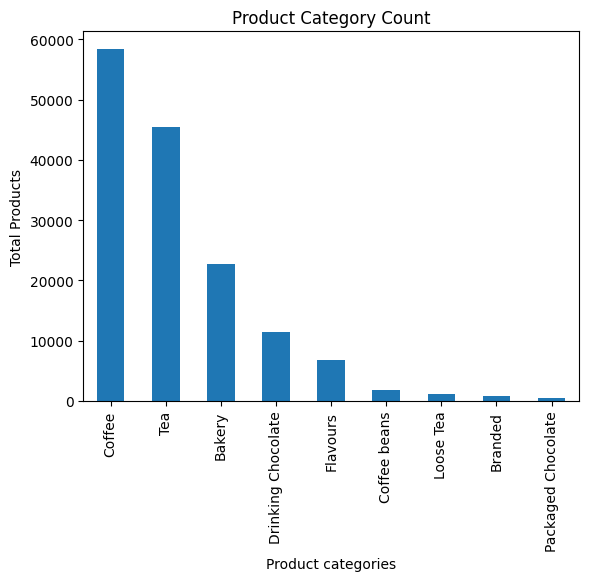

In [31]:
coffee['product_category'].value_counts().plot(kind='bar')
plt.title('Product Category Count')
plt.ylabel('Total Products')
plt.xlabel('Product categories')
plt.show()

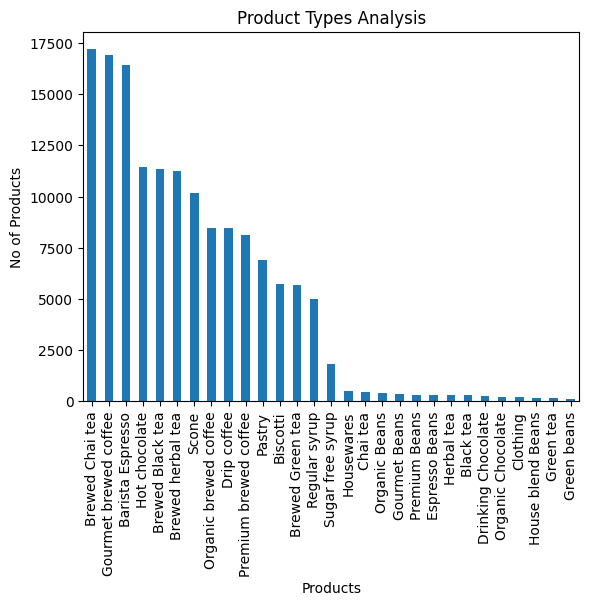

In [32]:
coffee['product_type'].value_counts().plot(kind='bar')
plt.title('Product Types Analysis')
plt.ylabel('No of Products')
plt.xlabel('Products')
plt.show()

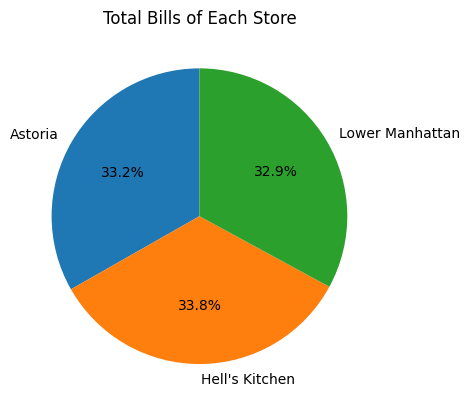

In [34]:
plt.pie(
    store_total_bills,
    labels=store_total_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Bills of Each Store')
plt.show()

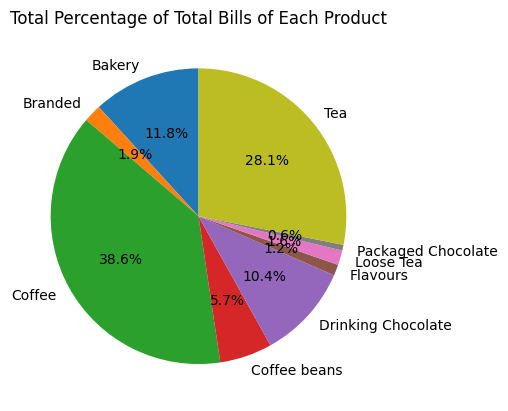

In [62]:
plt.pie(
    product_total_bills,
    labels=product_total_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Percentage of Total Bills of Each Product')
plt.show()

In [39]:
monthly_bills = coffee.groupby('Month Name')['Total_Bill'].sum()
print(monthly_bills)

Month Name
April       118941.08
February     76145.19
January      81677.74
June        166485.88
March        98834.68
May         156727.76
Name: Total_Bill, dtype: float64


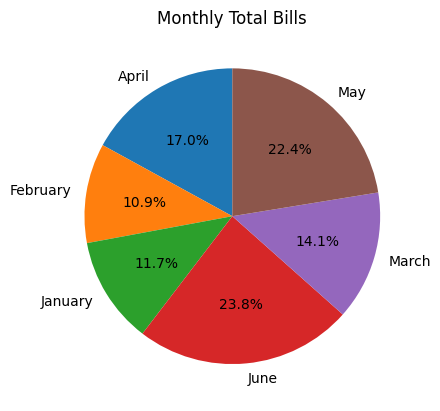

In [40]:
plt.pie(
    monthly_bills,
    labels=monthly_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Monthly Total Bills')
plt.show() 

<Axes: title={'center': 'Montly Total Bills'}, xlabel='Month Name'>

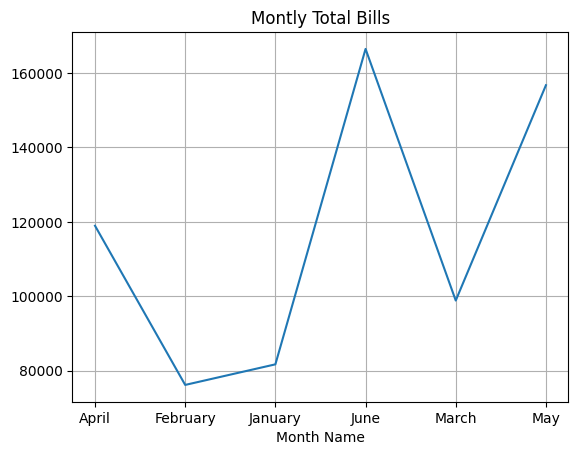

In [42]:
monthly_bills.plot(grid=True,title='Montly Total Bills',legend=False)

In [44]:
weekly_bills = coffee.groupby('Day of Week')['Total_Bill'].sum()
print(weekly_bills)

Day of Week
0    101677.28
1     99455.94
2    100313.54
3    100767.78
4    101373.00
5     96894.48
6     98330.31
Name: Total_Bill, dtype: float64


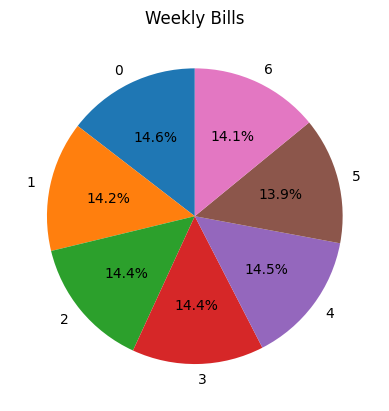

In [47]:
plt.pie(
    weekly_bills,
    labels=weekly_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Weekly Bills')
plt.show() 

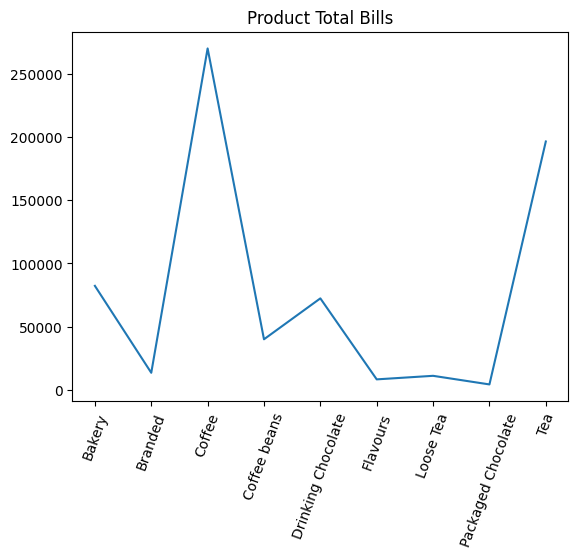

In [56]:
plt.plot(
    product_total_bills
)
plt.title('Product Total Bills')
plt.xticks(rotation=70)
plt.show()

<Axes: >

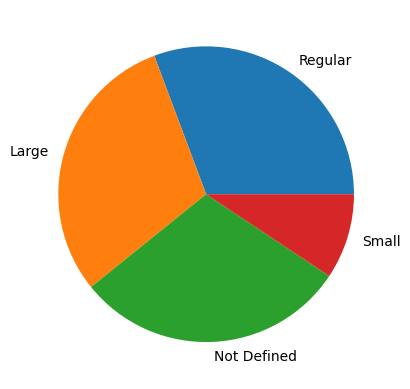

In [63]:
coffee['Size'].value_counts().plot(kind='pie')

In [64]:
peak_hour = coffee.groupby('Hour')['Total_Bill'].sum()
print(peak_hour.sort_values(ascending=False))

Hour
10    88673.39
9     85169.53
8     82699.87
7     63526.47
11    46319.14
15    41733.10
14    41304.74
16    41122.75
13    40367.45
12    40192.79
17    40134.31
18    34286.20
19    28446.68
6     21900.27
20     2935.64
Name: Total_Bill, dtype: float64


<Axes: title={'center': 'Hour Sales'}, xlabel='Hour'>

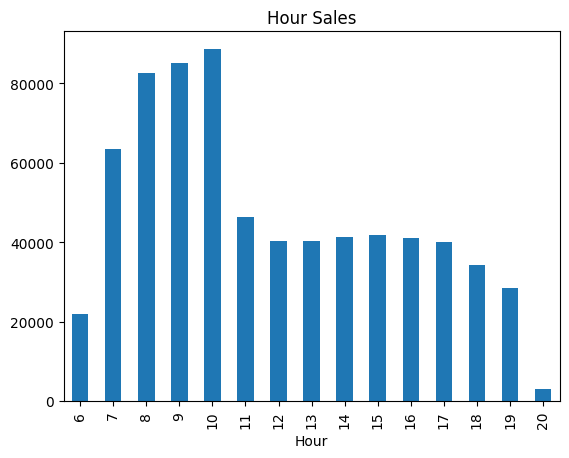

In [67]:
peak_hour.plot(x='Hour',y='Total_Bills',title='Hour Sales',kind='bar')

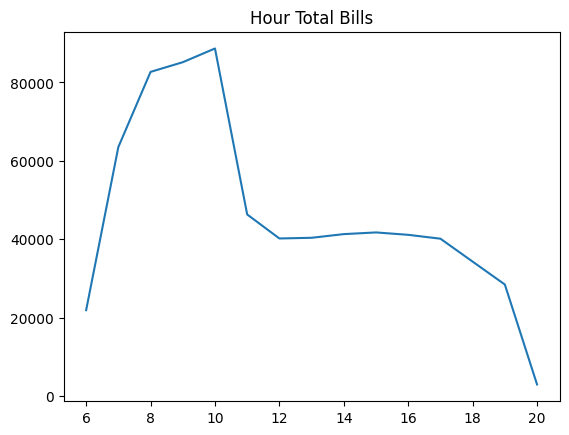

In [68]:
plt.plot(peak_hour)
plt.title('Hour Total Bills')
plt.show()